In [7]:
from zipfile import ZipFile as zf
from PIL import Image
from PIL import ImageDraw
import pytesseract
import cv2 as cv
import numpy as np

face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('readonly/haarcascade_eye.xml')

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"#running personal copy of jupyter and tesseract

small_file = 'readonly/small_img.zip'
large_file = 'readonly/images.zip'

class Face_Search():

    def __init__(self, text_to_search, file):
        self.images = []
        self.image_names = []
        self.image_dict = {}
        self.zfile = file
        self.phrase = text_to_search

    def image_to_dict(self):
        with zf(self.zfile) as zip:
            namelist = zip.namelist()
            for name in namelist:
                self.image_names.append(name)
            for info in zip.infolist():
                with zip.open(info) as file:
                    self.image=Image.open(file).convert('RGB')
                    self.images.append(self.image)
        pos = 0
        for name in self.image_names:
            self.image_dict[name] = [self.images[pos], [],[]]
            pos+=1
        return self.image_dict

    def binarize(self, image_to_transform, threshold):
        output_image=image_to_transform.convert("L")
        for x in range(output_image.width):
            for y in range(output_image.height):
                if output_image.getpixel((x,y))< threshold:
                    output_image.putpixel( (x,y), 0 )
                else:
                    output_image.putpixel( (x,y), 255 )
        return output_image

    def text_to_dict(self):
        for key in self.image_dict:
            #image = binarize((image_dict[key][0]), 128)
            image = self.image_dict[key][0]
            text = pytesseract.image_to_string(image)
            text = text.replace('\n',' ')
            text = text.replace('- ','')
            text = text.upper()
            self.image_dict[key][2] = text
        return self.image_dict

    def get_cs_size(self,lst):
        x = 500
        y = len(lst)
        if y % 5 != 0:
            y = ((y//5)+1)*100
        else: y = (y//5)*100
        return (x,y)

    def contact_sheet(self, face_list):
        size = self.get_cs_size(face_list)
        new_image = Image.new('RGB', size)
        return new_image

    def make_cs(self, face_image):
        open_cv_image = np.array(face_image) #pil.image
        open_cv_image = open_cv_image[:, :, ::-1].copy()
        gray = cv.cvtColor(open_cv_image, cv.COLOR_BGR2GRAY)
        cv_img_bin=cv.threshold(gray,180,230,cv.THRESH_BINARY)[1]
        faces = face_cascade.detectMultiScale(cv_img_bin, 1.302, 3, 30)
        #try:
        rec = faces.tolist()
        rec.reverse()
        contactsheet = self.contact_sheet(rec)
        x = 0
        y = 0
        for face in rec:
            #print(face)
            copy = face_image.copy()
            region = copy.crop((face[0],face[1],face[0]+face[2],face[1]+face[3]))
            region.thumbnail((100,100))
            image_placeholder = Image.new('RGB', (100,100))
            image_placeholder.paste(region,(0,0))
            contactsheet.paste(region,(x,y))
            if x + image_placeholder.width == contactsheet.width:
                x = 0
                y = y + image_placeholder.height
            else:
                x = x + image_placeholder.width
        return contactsheet
        #except: return 'But there were no faces in that file!'

    def cs_to_dict(self):
        for key in self.image_dict:
            image = self.image_dict[key][0]
            self.image_dict[key][1] = self.make_cs(self.image_dict[key][0])
        return self.image_dict

    def word_search(self):
        for key in self.image_dict:
            if self.phrase in self.image_dict[key][2]:
                print('Results found in file {}'.format(key))
                display(self.image_dict[key][1])


In [9]:
chris = Face_Search('CHRISTOPHER', small_file)

In [10]:
chris.image_to_dict()

{'a-0.png': [<PIL.Image.Image image mode=RGB size=3600x6300 at 0x2853D6D3908>,
  [],
  []],
 'a-1.png': [<PIL.Image.Image image mode=RGB size=3600x6300 at 0x285404F6AC8>,
  [],
  []],
 'a-2.png': [<PIL.Image.Image image mode=RGB size=3600x6300 at 0x2853D6D8D48>,
  [],
  []],
 'a-3.png': [<PIL.Image.Image image mode=RGB size=7200x6300 at 0x2853D6D34C8>,
  [],
  []]}

In [11]:
chris.cs_to_dict()

{'a-0.png': [<PIL.Image.Image image mode=RGB size=3600x6300 at 0x2853D6D3908>,
  <PIL.Image.Image image mode=RGB size=500x200 at 0x2853D65B688>,
  []],
 'a-1.png': [<PIL.Image.Image image mode=RGB size=3600x6300 at 0x285404F6AC8>,
  <PIL.Image.Image image mode=RGB size=500x100 at 0x2853D65B0C8>,
  []],
 'a-2.png': [<PIL.Image.Image image mode=RGB size=3600x6300 at 0x2853D6D8D48>,
  <PIL.Image.Image image mode=RGB size=500x100 at 0x2853D65B2C8>,
  []],
 'a-3.png': [<PIL.Image.Image image mode=RGB size=7200x6300 at 0x2853D6D34C8>,
  <PIL.Image.Image image mode=RGB size=500x100 at 0x2853D65B3C8>,
  []]}

In [13]:
chris.text_to_dict()

{'a-0.png': [<PIL.Image.Image image mode=RGB size=3600x6300 at 0x2853D6D3908>,
  <PIL.Image.Image image mode=RGB size=500x200 at 0x2853D65B688>,
  "CHE MICHIGAN DAILY  ANN ARBOR, MICHIGAN  WEDNESDAY, NOVEMBER 5, 2014  MICHIGANDAILY.COM  BIG DAY FOR REPUBLICANS  SNYDER EARNS SECOND TERM; G.O.P. TAKES CONTROL OF U.S. SENATE  STATE  EXECUTIVE GOVERNOR RICK SNYDER (R)  LIEUTENANT GOVERNOR BRIAN CALLEY (R)  SECRETARY OF STATE RUTH JOHNSON CR)  STATE JUDICIAL  ATTORNEY GENERAL BILL SCHUETTE CR)  MICHIGAN LEGISLATIVE  MICHIGAN STATE SENATE REBEKAH WARREN (D)  MICHIGAN HOUSE OF REPRESENTATIVES JEFF IRWIN CD)  U.S. LEGISLATIVE  U.S. SENATE GARY PETERS (D)  U.S. HOUSE OF REPRESENTATIVES DEBBIE DINGELL (D)  WASHTENAW COUNTY  PROBATE COURT JULIA OWDZIEJ (D)  CIRCUIT COURT PATRICK CONLIN (D)  ANN ARBOR MAYOR CHRISTOPHER TAYLOR (D)  CITY COUNCIL  SUMI KAILASAPATHY (D) CHUCK WARPEHOSKI (D) JULIE GRAND (D) GRAYDON KRAPHOL (D) KIRK WESTPHAL (D)  REGENTS  TOO CLOSE TO CALL  HI: 51 LO: 30  WEATHER TOMORR

Results found in file a-0.png


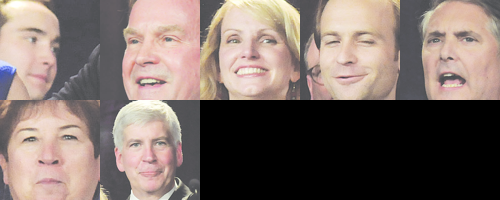

Results found in file a-3.png


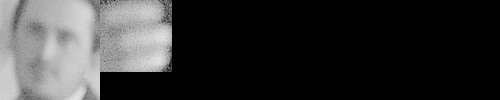

In [14]:
chris.word_search()